### LABORATORIO #2 

- Diego Duarte
- Paula Barilals

Datos de entrenamiento: 60000
Datos de prueba: 10000
Forma de X_entreno: (60000, 28, 28)
Forma de X_prueba: (10000, 28, 28)


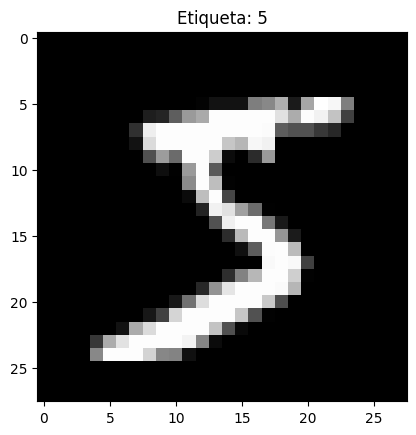

In [ ]:
import numpy as np
import tensorflow as tf

(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()

# Imprimir cantidad de datos de entrenamiento y prueba
print(f"Datos de entrenamiento: {X_entreno.shape[0]}")
print(f"Datos de prueba: {X_prueba.shape[0]}")

# Mostrar forma de los datos
print(f"Forma de X_entreno: {X_entreno.shape}")
print(f"Forma de X_prueba: {X_prueba.shape}")

# Preprocesamiento: normalizar imágenes a rango [0, 1]
X_entreno = X_entreno.astype('float32') / 255.0
X_prueba = X_prueba.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_entreno = tf.keras.utils.to_categorical(y_entreno, 10)
y_prueba = tf.keras.utils.to_categorical(y_prueba, 10)

# ejemplo de imagen y etiqueta
import matplotlib.pyplot as plt
plt.imshow(X_entreno[0], cmap='gray')
plt.title(f"Etiqueta: {np.argmax(y_entreno[0])}")
plt.show()

### 1. Modificación del Ancho de la Red (8 puntos)
- Modifique el tamaño de la capa escondida a 200 neuronas.
- Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento

1. ¿Cómo cambia la precisión de validación del modelo?

2. ¿Cuánto tiempo tarda el algoritmo en entrenar?



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# crear y entrenar el modelo con diferente tamaño de capa escondida
def entrenar_modelo(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128, 
                        validation_data=(X_prueba, y_prueba), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Capa escondida: {hidden_units} neuronas")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print("-" * 40)
    return val_acc, val_loss

# Probar diferentes tamaños de capa escondida
for unidades in [50, 100, 200, 300, 500]:
    entrenar_modelo(unidades)


Capa escondida: 50 neuronas
  Precisión de validación final: 0.9595
  Pérdida de validación final: 0.1326
----------------------------------------
Capa escondida: 100 neuronas
  Precisión de validación final: 0.9700
  Pérdida de validación final: 0.0990
----------------------------------------
Capa escondida: 200 neuronas
  Precisión de validación final: 0.9764
  Pérdida de validación final: 0.0794
----------------------------------------
Capa escondida: 300 neuronas
  Precisión de validación final: 0.9783
  Pérdida de validación final: 0.0684
----------------------------------------
